In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

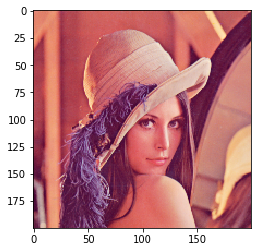

In [58]:
imgs = cv2.imread('images/Lenna_.png')
img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
img= cv2.resize(img,(200,200))
plt.imshow(img)

## Cropping

Text(0.5, 1.0, 'Face Cropped Image')

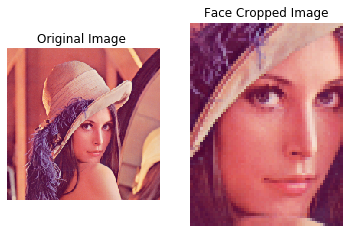

In [59]:
# Cropped image 
x, y= 75,75
h,w= 60,80
crop = img[x:x+w,y:y+h]
copy= cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
cv2.imwrite('./images/lena_crop.png',copy)
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(crop)
ax2.axis('off')
ax2.set_title('Face Cropped Image')

Text(0.5, 1.0, 'Vertical Flip')

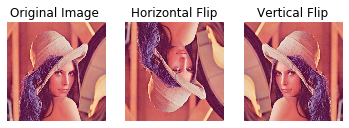

In [44]:
# Flip image
flip0= cv2.flip(img,0)
flip1= cv2.flip(img,1)
fig = plt.figure()
se = cv2.flip(imgs,0)
cv2.imwrite('./images/horiz_flip.png',se)
swe = cv2.flip(imgs,1)
cv2.imwrite('./images/vert_flip.png',swe)

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(flip0)
ax2.axis('off')
ax2.set_title('Horizontal Flip')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(flip1)
ax3.axis('off')
ax3.set_title('Vertical Flip')



(128, 128, 3)
(200, 200, 3)
(256, 256, 3)


Text(0.5, 1.0, 'Enlarged (256,256)')

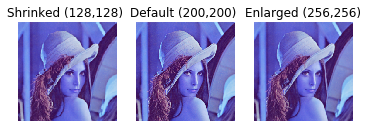

In [62]:
# Resize
imk= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
smal= cv2.resize(imk,(128,128))
larg = cv2.resize(imk,(256,256))

cv2.imwrite('./images/small.png',smal)
cv2.imwrite('./images/large.png',larg)
cv2.imwrite('./images/default.png',imk)
print(smal.shape)
print(imk.shape)
print(larg.shape)

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(smal)
ax1.axis('off')
ax1.set_title('Shrinked (128,128) ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imk)
ax2.axis('off')
ax2.set_title('Default (200,200) ')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(larg)
ax3.axis('off')
ax3.set_title('Enlarged (256,256)')


(512, 512, 3)